<a href="https://colab.research.google.com/github/casjunior93/Desafio-Tera-iFood--Clusterizacao/blob/main/Desafio_Tera_e_Ifood_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando acesso do Colab ao Google Drive



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bibliotecas fundamentais

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.

# Passo 1: Abordar o problema e analisar o panorama em geral

A diversidade e amplitude de clientes que utilizam a plataforma do iFood é gigante - a cobertura do aplicativo se estende por muitas geografias no Brasil, de múltiplos gostos, regionalismos e bolsos. Alguns buscam uma experiência no momento da refeição, outros só querem receber a marmita na hora certa para não se atrasar para a primeira reunião pós-almoço.

Neste contexto, precisamos entender melhor nossos clientes! Quem é o mais fiel e quem mais compra conosco? Quem mais gosta de cupom? Quem gosta de entrega grátis? Qual o padrão de consumo? Qual o padrão de comportamento? Quanto os clientes vão gastar? Onde?

# Passo 2: Obter os dados

Dados de pedidos:

In [4]:
pedidos = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Aulas/DESAFIO IFOOD DE CLUSTERING/dados_desafio_ifood/orders.csv', sep=';', 
                      parse_dates=['confirmed_date', 'concluded_date', 'review_created_at'])

In [5]:
pedidos.head(2)

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,...,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,875.00,False,5375.00,0.00,ANDROID,MOBILE,9.39.1,...,-43.38,-22.83,False,2020-02-28 14:07:25.953000+00:00,2020-02-28 16:06:03.701000+00:00,1.00,70a2a5a3-8071-47fc-a623-e9995045314e,5.00,8,2020-02-28 19:06:31.861000+00:00
1,0018ed39-3ae0-4047-9c9e-fd9a2027e645,weekend dinner,RESTAURANT,0.00,False,2987.50,1250.00,IOS,MOBILE,9.63.0,...,-43.22,-22.93,True,2020-08-21 21:12:23.295000+00:00,2020-08-21 21:59:18.732000+00:00,1.00,407bab9f-f485-48cd-abea-66e6283058c3,5.00,8,2020-09-04 00:14:14.365000+00:00


Dados de marketing:

In [6]:
marketing = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Aulas/DESAFIO IFOOD DE CLUSTERING/dados_desafio_ifood/marketing.csv', sep=';',
                        parse_dates=['registration_date', 'first_order_date'])

In [7]:
marketing.head(2)

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,2016-05-17,Churn,Active,457,2017-03-19


Dados de sessões:

In [8]:
sessoes = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Aulas/DESAFIO IFOOD DE CLUSTERING/dados_desafio_ifood/sessions.csv', sep=';',
                      parse_dates=['session_started', 'session_ended'])

In [9]:
sessoes.head(2)

,session_id,user_account_uuid,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,first_order_has_voucher,media_campaign,load_time,available_restaurants,rownumber
0,0a364c77-4375-4334-8f64-a06bdd22229c,5a2fbdea-e2ee-41a5-b47c-41fbebdc78ef,2020-02-01 00:00:03.924000+00:00,2020-02-01 00:10:51.217000+00:00,NaN,19,5,6,6,7,False,NaN,5.00,462.00,1
1,b01811cd-ad2c-42f1-bccf-b90698ccc7a8,20cb43a7-c90d-4451-b067-e1b934746de6,2020-02-01 00:00:09.616000+00:00,2020-02-01 00:14:22.713000+00:00,NaN,14,1,0,0,0,NaN,NaN,5.00,128.00,2


# Passo 3: Explorar os dados para obter informações úteis

## Pedidos

In [10]:
pedidos.describe(include='all')

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,...,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at
count,226269,226269,226269,226269.00,226269,226269.00,226269.00,226269,226269,221834,...,226269.00,226269.00,226269,226255,226265,226085.00,226269,226269.00,226269.00,226269
unique,226269,10,3,NaN,2,NaN,NaN,3,2,213,...,NaN,NaN,2,226232,226187,NaN,13964,NaN,NaN,226268
top,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,NaN,False,NaN,NaN,ANDROID,MOBILE,9.37.1,...,NaN,NaN,True,2020-02-28 11:46:11.235000+00:00,2020-02-05 14:30:46.629000+00:00,NaN,d300ac6b-3fd5-4f24-b80e-a2a0066f925c,NaN,NaN,2020-09-07 15:53:40.389000+00:00
freq,1,58433,219886,NaN,220683,NaN,NaN,118145,202494,9130,...,NaN,NaN,119785,2,3,NaN,834,NaN,NaN,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2020-02-01 00:06:39.811000+00:00,2020-02-01 01:02:08.216000+00:00,NaN,NaN,NaN,NaN,2020-02-01 01:03:06.465000+00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2020-09-30 23:57:49.783000+00:00,2020-10-01 01:57:49.250000+00:00,NaN,NaN,NaN,NaN,2020-10-16 00:50:14.035000+00:00
mean,NaN,NaN,NaN,405.42,NaN,6017.81,343.69,NaN,NaN,NaN,...,-45.69,-23.19,NaN,NaN,NaN,2.51,NaN,4.67,9.11,NaN
std,NaN,NaN,NaN,504.03,NaN,5180.78,677.85,NaN,NaN,NaN,...,2.19,2.21,NaN,NaN,NaN,11.99,NaN,0.93,1.90,NaN
min,NaN,NaN,NaN,-1247.50,NaN,0.00,-2.50,NaN,NaN,NaN,...,-67.84,-31.78,NaN,NaN,NaN,0.00,NaN,1.00,1.00,NaN
25%,NaN,NaN,NaN,0.00,NaN,2768.75,0.00,NaN,NaN,NaN,...,-46.70,-23.60,NaN,NaN,NaN,0.00,NaN,5.00,9.00,NaN


### Tipo dos dados

In [11]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226269 entries, 0 to 226268
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   order_id              226269 non-null  object             
 1   order_shift           226269 non-null  object             
 2   order_origin          226269 non-null  object             
 3   delivery_fee          226269 non-null  float64            
 4   scheduled             226269 non-null  bool               
 5   total_amount          226269 non-null  float64            
 6   subsidy_amount        226269 non-null  float64            
 7   device_platform       226269 non-null  object             
 8   device_type           226269 non-null  object             
 9   device_app_version    221834 non-null  object             
 10  centroid_id           226269 non-null  object             
 11  state_label           226269 non-null  object       

### Dados faltantes

In [12]:
pedidos.isnull().sum()

order_id                   0
order_shift                0
order_origin               0
delivery_fee               0
scheduled                  0
total_amount               0
subsidy_amount             0
device_platform            0
device_type                0
device_app_version      4435
centroid_id                0
state_label                0
city                       0
district                   0
customer_long              0
customer_lat               0
restaurant_id              0
dish_type                  0
group_id                   0
merchant_centroid_id       0
merchant_state             0
merchant_city              0
merchant_district          0
merchant_zipcode           0
merchant_long              0
merchant_lat               0
has_free_delivery          0
confirmed_date            14
concluded_date             4
lag_last_order           184
account_id                 0
review_score               0
nps_score                  0
review_created_at          0
dtype: int64

In [13]:
import missingno as msno

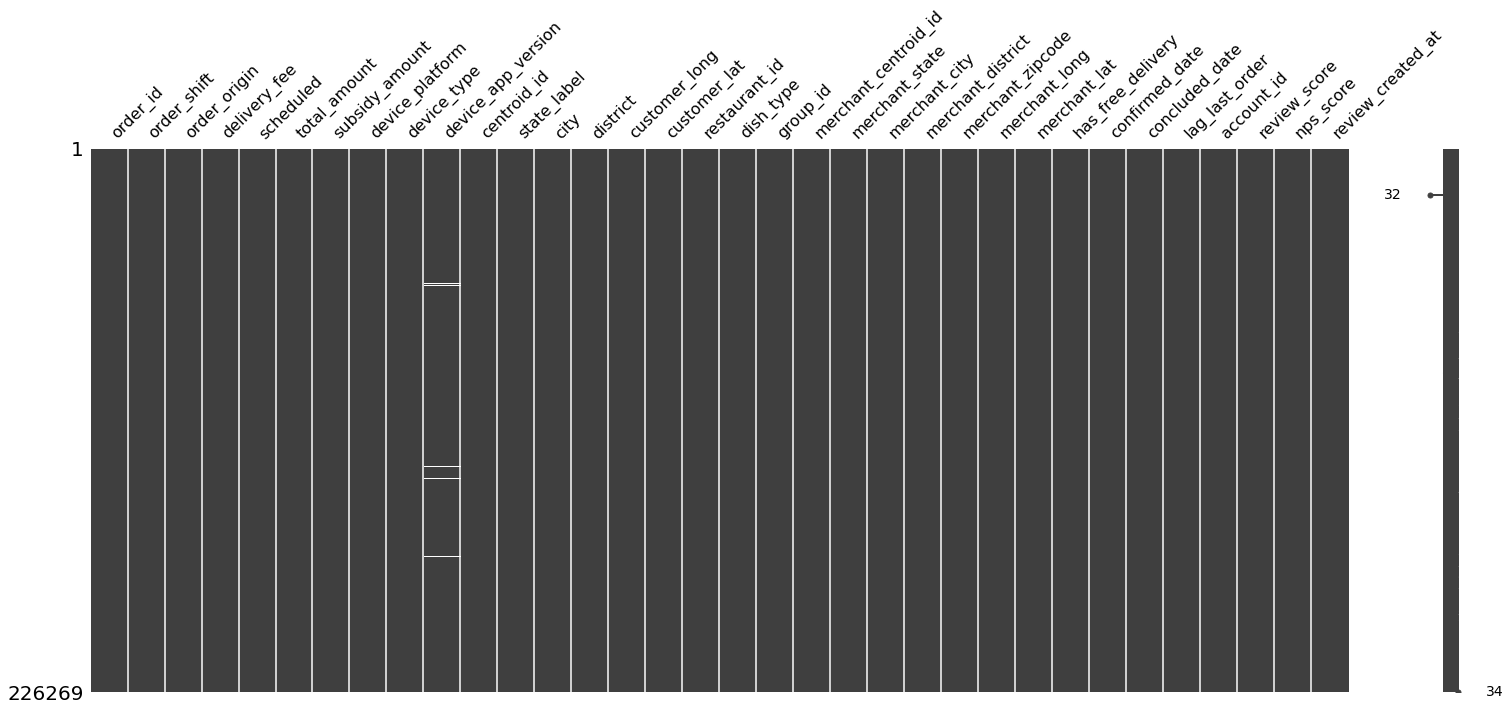

In [14]:
msno.matrix(pedidos)

### Visualização das features

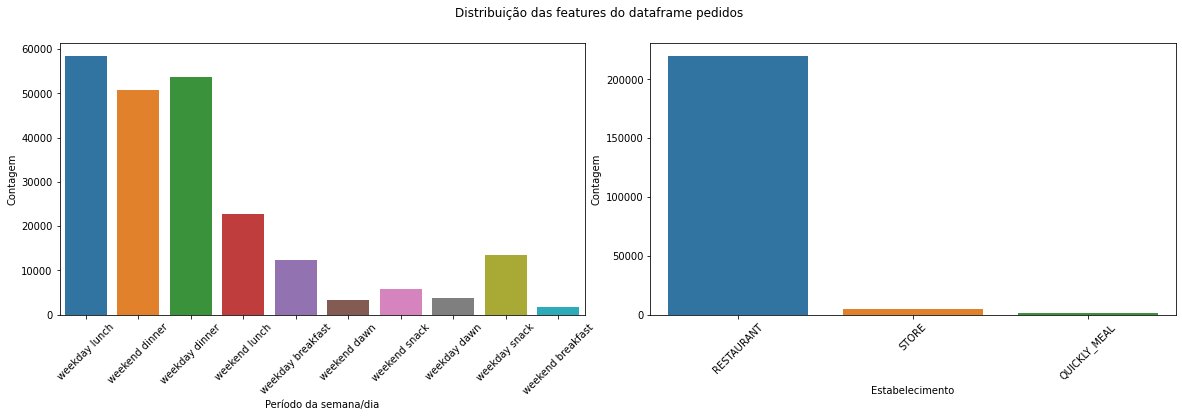

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe pedidos')

#Order shift
sns.countplot(ax=axes[0],x=pedidos['order_shift'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set(xlabel='Período da semana/dia', ylabel='Contagem')

#Order origin
sns.countplot(ax=axes[1],x=pedidos['order_origin'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set(xlabel='Estabelecimento', ylabel='Contagem')

plt.show();

*  Há mais pedidos durante a semana no almoço. Pedidos para janta durante a semana fica em segundo lugar.
* A grande maioria dos pedidos são feitos para restaurante. Há um grande desbalanceamento na feature order_origin

> 1. Será que as pessoas tem menos tempo para fazer suas próprias refeições durante o meio da semana? Trabalho? Deslocamento?

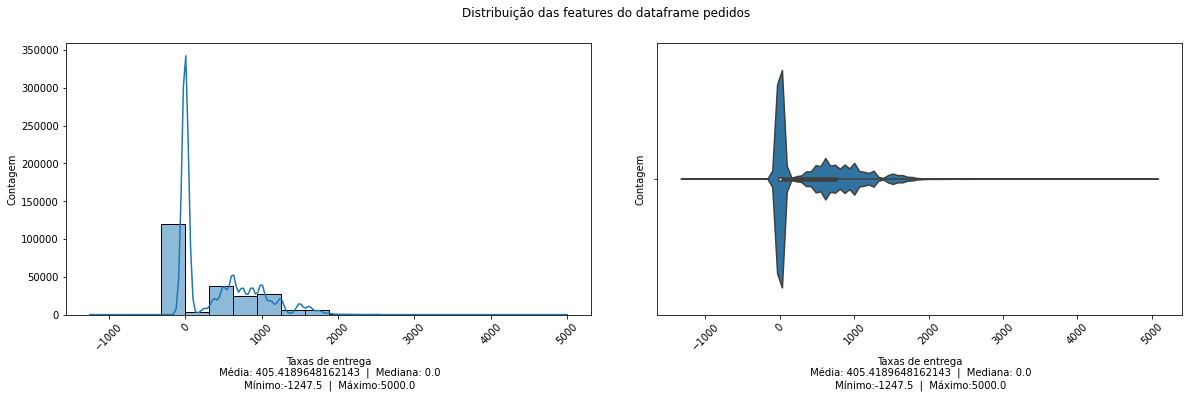

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe pedidos')

#Taxa de entrega
sns.histplot(ax=axes[0],x=pedidos['delivery_fee'], kde=True, bins=20)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set(xlabel='Taxas de entrega\n Média: ' + str(pedidos['delivery_fee'].mean()) + '  |  Mediana: ' + str(pedidos['delivery_fee'].median())
  + '\n Mínimo:' + str(pedidos['delivery_fee'].min()) + '  |  Máximo:' + str(pedidos['delivery_fee'].max()), ylabel='Contagem')

#Taxa de entrega
sns.violinplot(ax=axes[1],x=pedidos['delivery_fee'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set(xlabel='Taxas de entrega\n Média: ' + str(pedidos['delivery_fee'].mean()) + '  |  Mediana: ' + str(pedidos['delivery_fee'].median())
  + '\n Mínimo:' + str(pedidos['delivery_fee'].min()) + '  |  Máximo:' + str(pedidos['delivery_fee'].max()), ylabel='Contagem')

plt.show();

* A grande maioria das taxas de entregas fica em torno de 0 reais, porém há uns dados curiosos de taxas negativas e também taxas muito altas.
*  Entre 200 reais e 1500 reais nota-se uma densidade mais alta de valores de taxas de entregas. Entre 1500 e 2000 reais nota-se também um aumento de densidade de valores de taxas de entrega.

> 1. Qual o motivo de taxas negativas?
> 2. As taxas mais altas são outliers que podem ser descartados?



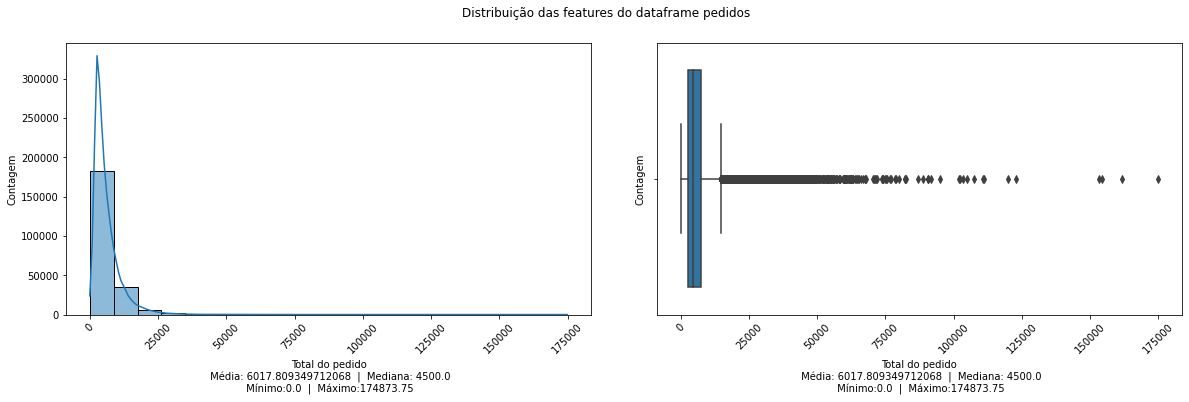

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe pedidos')

#Taxa do pedido
sns.histplot(ax=axes[0],x=pedidos['total_amount'], kde=True, bins=20)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set(xlabel='Total do pedido\n Média: ' + str(pedidos['total_amount'].mean()) + '  |  Mediana: ' + str(pedidos['total_amount'].median())
  + '\n Mínimo:' + str(pedidos['total_amount'].min()) + '  |  Máximo:' + str(pedidos['total_amount'].max()), ylabel='Contagem')

#Taxa do pedido
sns.boxplot(ax=axes[1],x=pedidos['total_amount'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set(xlabel='Total do pedido\n Média: ' + str(pedidos['total_amount'].mean()) + '  |  Mediana: ' + str(pedidos['total_amount'].median())
  + '\n Mínimo:' + str(pedidos['total_amount'].min()) + '  |  Máximo:' + str(pedidos['total_amount'].max()), ylabel='Contagem')

plt.show();

* A grande maioria dos pedidos custam de 0 a 10 mil reais (!)
* A maior frequência de valores de pedidos fica em torno de 4500 reais (!)
* Há vários outliers de valores que vão até aprox. 175 mil reais! (!)

> * Esses valores de outliers podem ser dados verídicos, devido à quantidade deles?
> * Porque a maioria dos pedidos ficam tão caros? Se são feitos em dias comerciais, podem ser empresas que compram comida para seus funcionários através do iFood?

(!) significa 'Caraaaaaamba'

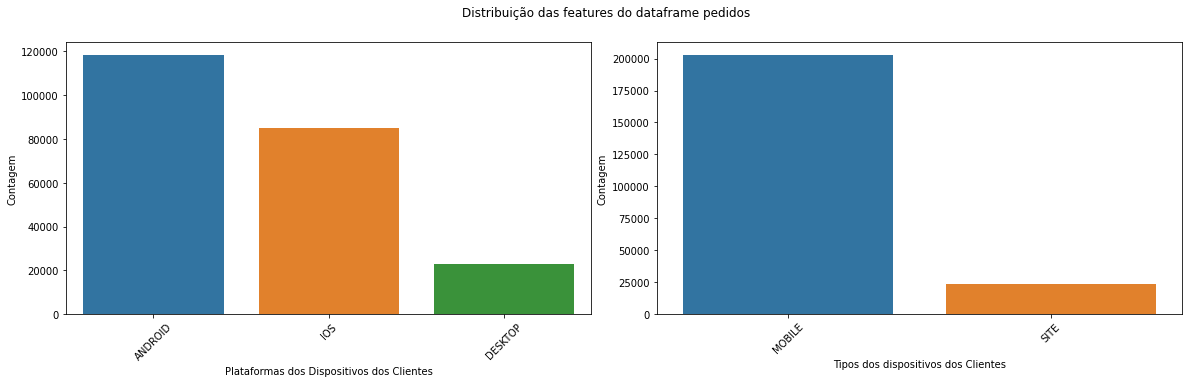

In [94]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe pedidos')

#Order shift
sns.countplot(ax=axes[0],x=pedidos['device_platform'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set(xlabel='Plataformas dos Dispositivos dos Clientes', ylabel='Contagem')

#Order origin
sns.countplot(ax=axes[1],x=pedidos['device_type'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set(xlabel='Tipos dos dispositivos dos Clientes', ylabel='Contagem')

plt.show();

* Os clientes pedem mais por smartphones. Há um grande desbalanceamento na feature device_type.
* As plataformas mais utilizadas são para mobile, o que fortalece o ponto anterior.

### Pedidos por usuário

In [19]:
pedidos_por_usuario = pedidos.groupby(['account_id']).count()
pedidos_por_usuario = pedidos_por_usuario.reset_index()
pedidos_por_usuario.head()

,account_id,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,...,merchant_zipcode,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,review_score,nps_score,review_created_at
0,00073adf-7117-44ba-90fe-5879c9581b68,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,000b1fec-8616-4014-9581-c5a944911ac3,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,000db136-b110-4dd6-9d1c-a70ab1ab2d75,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
3,000f5a0c-cfac-44f9-a296-7f745b38a863,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
4,0019a335-0326-4032-af5b-7b76413633e0,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


### Valores totais por usuário

In [20]:
totais_por_usuario = pedidos.groupby(['account_id']).sum()
totais_por_usuario = totais_por_usuario.reset_index()
totais_por_usuario.head()

,account_id,delivery_fee,scheduled,total_amount,subsidy_amount,customer_long,customer_lat,merchant_zipcode,merchant_long,merchant_lat,has_free_delivery,lag_last_order,review_score,nps_score
0,00073adf-7117-44ba-90fe-5879c9581b68,0.00,0,2737.50,0.00,-49.30,-25.48,80610040,-49.29,-25.47,1,6.00,5.00,10
1,000b1fec-8616-4014-9581-c5a944911ac3,1497.50,1,18671.25,0.00,-172.80,-91.68,83231262,-172.80,-91.72,2,1.00,20.00,34
2,000db136-b110-4dd6-9d1c-a70ab1ab2d75,6246.25,0,105322.50,11115.00,-1215.39,-611.44,125361172,-1215.18,-611.41,15,55.00,123.00,260
3,000f5a0c-cfac-44f9-a296-7f745b38a863,8365.00,4,70342.50,1.25,-514.25,-260.15,53286096,-514.11,-260.03,3,6.00,51.00,101
4,0019a335-0326-4032-af5b-7b76413633e0,1372.50,0,34853.75,0.00,-93.36,-47.06,2655010,-93.34,-47.11,0,2.00,4.00,16


## Marketing

In [21]:
marketing.describe(include='all')

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
count,20249,20249,20249,20249,20249.00,20248
unique,20249,2994,5,6,NaN,2666
top,7c0450e7-a806-4208-8449-e4269a27e6b5,2010-01-05 00:00:00,Active,Active,NaN,2020-02-14 00:00:00
freq,1,49,11648,14080,NaN,49
first,NaN,2009-12-31 00:00:00,NaN,NaN,NaN,2012-01-01 00:00:00
last,NaN,2020-02-29 00:00:00,NaN,NaN,NaN,2021-03-31 00:00:00
mean,NaN,NaN,NaN,NaN,341.32,NaN
std,NaN,NaN,NaN,NaN,303.15,NaN
min,NaN,NaN,NaN,NaN,0.00,NaN
25%,NaN,NaN,NaN,NaN,91.00,NaN


### Tipos dos dados

In [22]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20249 entries, 0 to 20248
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               20249 non-null  object        
 1   registration_date        20249 non-null  datetime64[ns]
 2   ifood_status             20249 non-null  object        
 3   ifood_status_last_month  20249 non-null  object        
 4   total_order_count        20249 non-null  int64         
 5   first_order_date         20248 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 949.3+ KB


### Dados faltantes

In [23]:
marketing.isnull().sum()

account_id                 0
registration_date          0
ifood_status               0
ifood_status_last_month    0
total_order_count          0
first_order_date           1
dtype: int64

### Visualização das features

Tempo de cadastro no iFood

In [24]:
#convertendo data de registro para anos de cadastro para melhor visualização
marketing['anos_de_cadastro'] = ((marketing['registration_date'] - pd.to_datetime("today"))/np.timedelta64(1, 'Y'))*(-1)

In [25]:
marketing.head()

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date,anos_de_cadastro
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28,2.18
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,2016-05-17,Churn,Active,457,2017-03-19,5.89
2,61c051ee-d37c-45c6-8c22-c236db3b62b7,2018-09-02,Active,Active,206,2018-09-02,3.60
3,82e48692-e4fa-494e-b03e-6815a819b7b1,2017-11-10,Reactivated,Churn,47,2018-05-01,4.41
4,382af025-14c8-4ba9-b62f-deddd6f25789,2019-08-05,Inactive,Inactive,66,2019-08-12,2.68


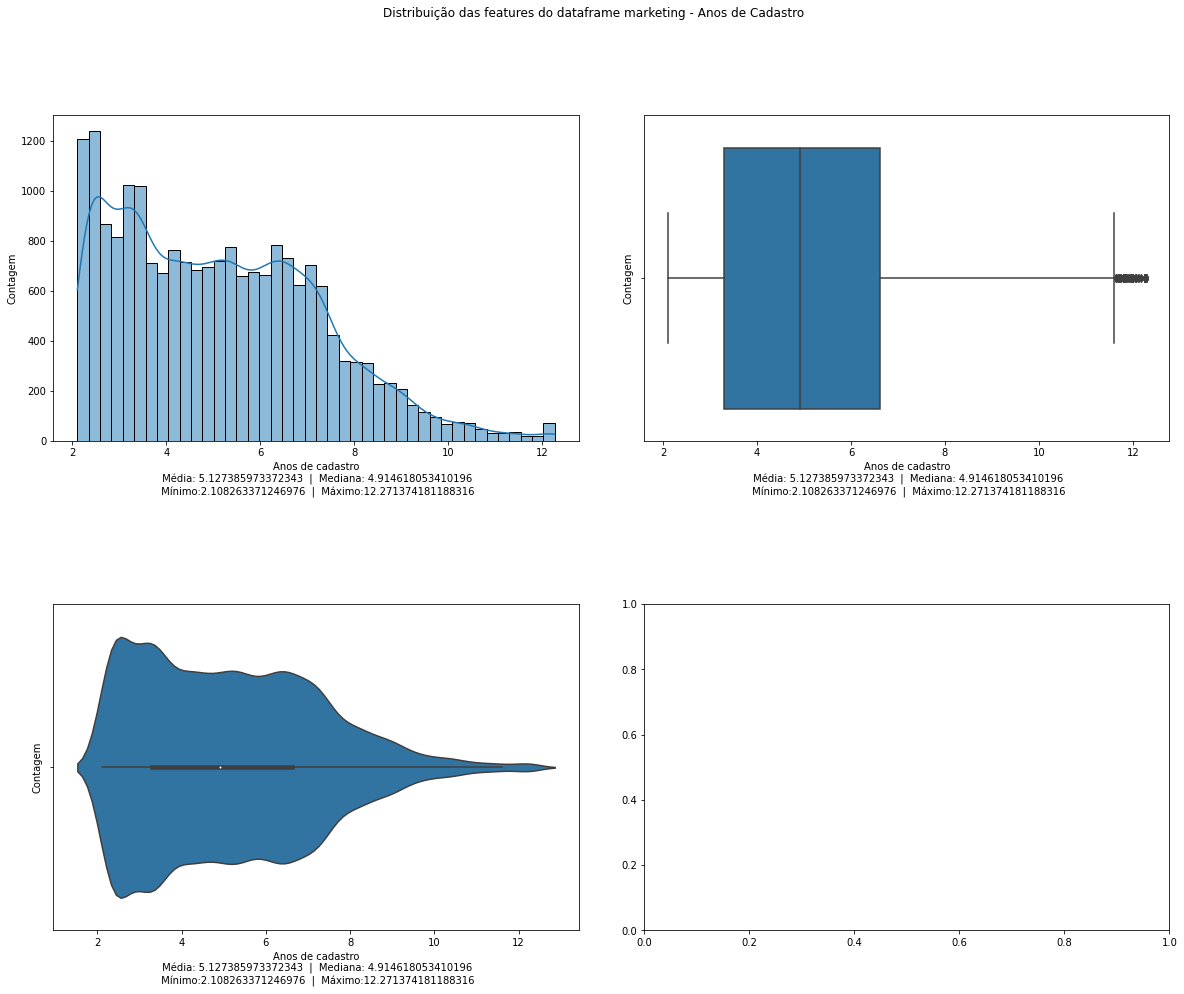

In [26]:
fig, axes = plt.subplots(2, 2, figsize = (20,15))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe marketing - Anos de Cadastro')

#Anos de cadastro
sns.histplot(ax=axes[0, 0], x=marketing['anos_de_cadastro'], kde=True)
axes[0, 0].tick_params(axis='x')
axes[0, 0].set(xlabel='Anos de cadastro\n Média: ' + str(marketing['anos_de_cadastro'].mean()) + '  |  Mediana: ' + str(marketing['anos_de_cadastro'].median())
  + '\n Mínimo:' + str(marketing['anos_de_cadastro'].min()) + '  |  Máximo:' + str(marketing['anos_de_cadastro'].max()), ylabel='Contagem')

#Anos de cadastro
sns.boxplot(ax=axes[0, 1],x=marketing['anos_de_cadastro'])
axes[0, 1].tick_params(axis='x')
axes[0, 1].set(xlabel='Anos de cadastro\n Média: ' + str(marketing['anos_de_cadastro'].mean()) + '  |  Mediana: ' + str(marketing['anos_de_cadastro'].median())
  + '\n Mínimo:' + str(marketing['anos_de_cadastro'].min()) + '  |  Máximo:' + str(marketing['anos_de_cadastro'].max()), ylabel='Contagem')

#Anos de cadastro
sns.violinplot(ax=axes[1, 0],x=marketing['anos_de_cadastro'])
axes[1, 0].tick_params(axis='x')
axes[1, 0].set(xlabel='Anos de cadastro\n Média: ' + str(marketing['anos_de_cadastro'].mean()) + '  |  Mediana: ' + str(marketing['anos_de_cadastro'].median())
  + '\n Mínimo:' + str(marketing['anos_de_cadastro'].min()) + '  |  Máximo:' + str(marketing['anos_de_cadastro'].max()), ylabel='Contagem')

plt.show();

* Cliente mais novos são maioria, o que pode indicar o crescimento de obtenção de clientes pela empresa.
* Há clientes bastante antigos, considerados como outliers.
* Houve um longo crescimento de clientes entre 6 e 12 anos atrás. De 3 a 6 anos o número de novos clientes estabilizou, mas voltou a aumentar nos últimos 2 a 3 anos.

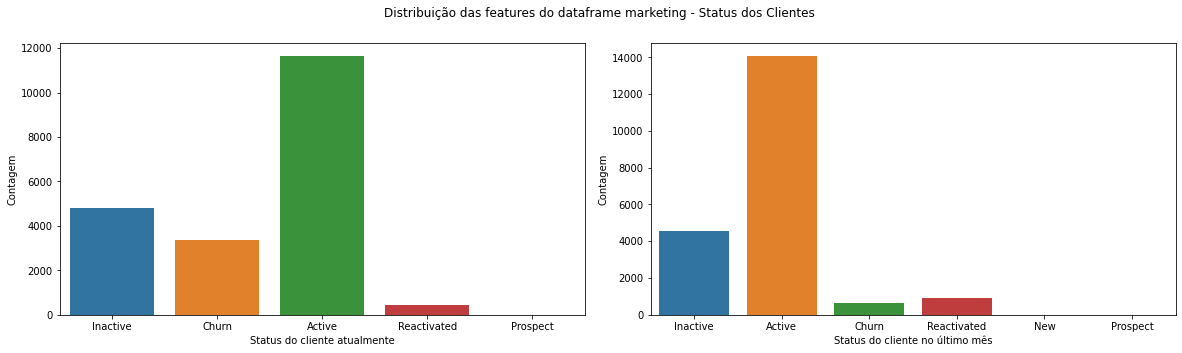

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe marketing - Status dos Clientes')

#Anos de cadastro
sns.countplot(ax=axes[0], x=marketing['ifood_status'])
axes[0].tick_params(axis='x')
axes[0].set(xlabel='Status do cliente atualmente', ylabel='Contagem')

#Anos de cadastro
sns.countplot(ax=axes[1],x=marketing['ifood_status_last_month'])
axes[1].tick_params(axis='x')
axes[1].set(xlabel='Status do cliente no último mês', ylabel='Contagem')

plt.show();

* O número desses clentes ativos continuou bem alto. Porém, pode-se ver que diminuíram o número de clientes ativos e aumentou a quantidade de Churn desde o mês anterior. 
* O número de inativos variou pouco. 
* Houve uma diminuição no número de reativados.

## Sessões

In [28]:
sessoes.describe(include = 'all')

,session_id,user_account_uuid,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,first_order_has_voucher,media_campaign,load_time,available_restaurants,rownumber
count,3591511,3591511,3591511,3545766,11543,3591511.00,3591511.00,3591511.00,3591511.00,3591511.00,420630,53423,2848111.00,3591511.00,3591511.00
unique,3591511,20095,3590984,3545202,11534,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,NaN
top,0a364c77-4375-4334-8f64-a06bdd22229c,9ca6a64b-e88c-456a-a42b-c0b1a85d025c,2020-04-23 21:06:55.947000+00:00,2020-04-23 22:34:22.184000+00:00,2020-07-16T14:26:27.000Z,NaN,NaN,NaN,NaN,NaN,False,CAMPANHA,NaN,NaN,NaN
freq,1,1618,2,2,2,NaN,NaN,NaN,NaN,NaN,360336,53423,NaN,NaN,NaN
first,NaN,NaN,2020-02-01 00:00:03.924000+00:00,2009-12-31 21:02:12.585000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-09-30 23:59:55.349000+00:00,2020-10-08 13:54:49.385000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.54,3.40,1.61,2.02,0.74,NaN,NaN,39.95,1161.83,1795756.00
std,NaN,NaN,NaN,NaN,NaN,12.91,6.02,2.87,4.23,2.10,NaN,NaN,1019.38,1121.17,1036780.07
min,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,-75972.00,0.00,1.00
25%,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,3.00,324.00,897878.50


### Tipos dos dados

In [29]:
sessoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591511 entries, 0 to 3591510
Data columns (total 15 columns):
 #   Column                      Dtype              
---  ------                      -----              
 0   session_id                  object             
 1   user_account_uuid           object             
 2   session_started             datetime64[ns, UTC]
 3   session_ended               datetime64[ns, UTC]
 4   install_timestamp           object             
 5   sum_view_restaurant_screen  int64              
 6   sum_view_dish_screen        int64              
 7   sum_click_add_item          int64              
 8   sum_view_checkout           int64              
 9   sum_callback_purchase       int64              
 10  first_order_has_voucher     object             
 11  media_campaign              object             
 12  load_time                   float64            
 13  available_restaurants       float64            
 14  rownumber                   int64 

### Dados faltantes

In [30]:
sessoes.isnull().sum()

session_id                          0
user_account_uuid                   0
session_started                     0
session_ended                   45745
install_timestamp             3579968
sum_view_restaurant_screen          0
sum_view_dish_screen                0
sum_click_add_item                  0
sum_view_checkout                   0
sum_callback_purchase               0
first_order_has_voucher       3170881
media_campaign                3538088
load_time                      743400
available_restaurants               0
rownumber                           0
dtype: int64

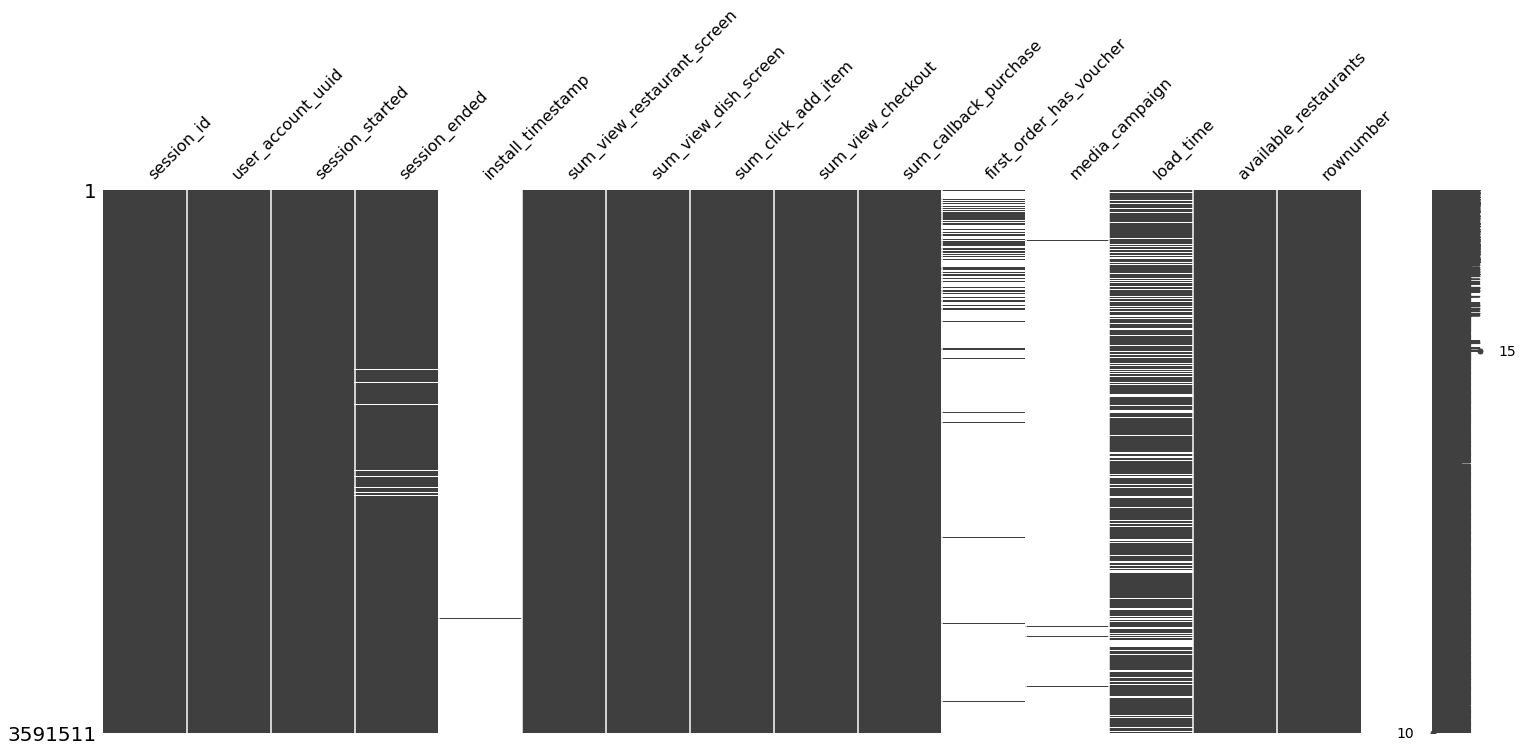

In [31]:
msno.matrix(sessoes)

### Visualização das features

Sessôes iniciadas por data:

In [32]:
df_data = sessoes.copy()
df_data['session_started'] = df_data['session_started'].dt.date
sessoes_por_data = df_data.groupby(['session_started']).count()
sessoes_por_data = sessoes_por_data.reset_index()

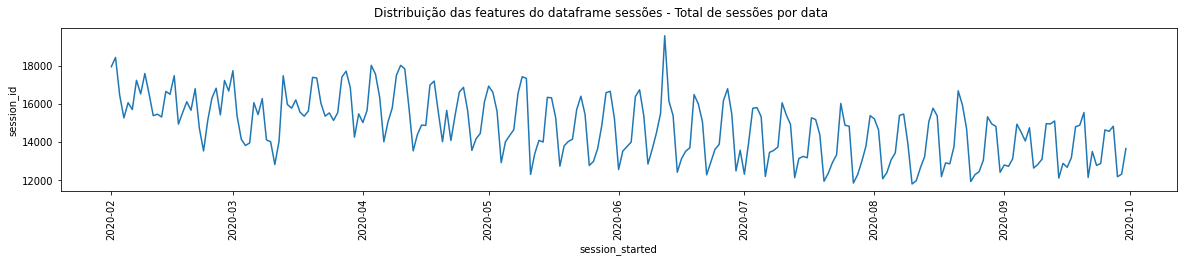

In [33]:
plt.rcParams["figure.figsize"] = (20,3)
sns.lineplot(data=sessoes_por_data, x="session_started", y="session_id")
plt.xticks(rotation=90)
plt.suptitle('Distribuição das features do dataframe sessões - Total de sessões por data')
plt.show();

Sessoes iniciadas por usuário:

In [34]:
sessoes_por_usuario = sessoes.groupby(['user_account_uuid']).count()
sessoes_por_usuario = sessoes_por_usuario.reset_index()

In [35]:
sessoes_por_usuario.head()

,user_account_uuid,session_id,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,first_order_has_voucher,media_campaign,load_time,available_restaurants,rownumber
0,00008f48-df50-41cc-998b-03e3c0dc373a,137,137,136,1,137,137,137,137,137,17,3,117,137,137
1,000545e9-7929-42fa-8515-d67b4d5c3fc9,115,115,111,0,115,115,115,115,115,28,0,61,115,115
2,00073adf-7117-44ba-90fe-5879c9581b68,198,198,195,0,198,198,198,198,198,11,3,180,198,198
3,000b1fec-8616-4014-9581-c5a944911ac3,351,351,350,1,351,351,351,351,351,33,8,329,351,351
4,000c857f-0bc8-4d4b-8533-b56c44425488,43,43,42,0,43,43,43,43,43,22,0,38,43,43


Somatória das features de cada usuário no período:

In [36]:
dados_usuarios_periodo = sessoes.groupby(['user_account_uuid']).sum()
dados_usuarios_periodo = dados_usuarios_periodo.reset_index()

In [37]:
dados_usuarios_periodo

,user_account_uuid,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,load_time,available_restaurants,rownumber
0,00008f48-df50-41cc-998b-03e3c0dc373a,1020,308,205,183,94,419.00,76257.00,249074627
1,000545e9-7929-42fa-8515-d67b4d5c3fc9,471,146,105,92,68,267.00,287770.00,206990436
2,00073adf-7117-44ba-90fe-5879c9581b68,697,452,259,483,157,3811.00,159132.00,396693625
3,000b1fec-8616-4014-9581-c5a944911ac3,1287,872,530,996,423,8007.00,343393.00,751379711
4,000c857f-0bc8-4d4b-8533-b56c44425488,117,138,62,119,25,261.00,23993.00,16634340
...,...,...,...,...,...,...,...,...,...
20090,ffed5c4e-e18a-4cfc-b985-472d18b5b1f0,207,86,49,36,10,1227.00,139048.00,88193447
20091,ffef562a-c954-4405-b89a-95908342766e,1135,529,260,503,155,4183.00,114973.00,468852153
20092,fffbe0eb-4420-4f1d-b360-a3c235d02ea3,2603,864,208,216,85,5103.00,460055.00,455322484
20093,fffd0e0e-43e3-4705-8299-d5c9b016c3e4,543,449,189,383,68,4512.00,228763.00,331988482


# Passo 4: Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.

## Montar o dataframe que vou usar na clusterização

Vou começar selecionando as características que considero importantes de cada um dos dataframes (sessoes, pedidos, marketing).

### Pedidos

Quantidade de pedidos por cliente:

In [38]:
usuarios_qtde_pedidos = pedidos_por_usuario[['account_id', 'order_id']]
#usuarios_pedidos = usuarios_pedidos.drop(columns=['order_id', 'order_shift', 'order_origin'])
usuarios_qtde_pedidos.head()

,account_id,order_id
0,00073adf-7117-44ba-90fe-5879c9581b68,1
1,000b1fec-8616-4014-9581-c5a944911ac3,4
2,000db136-b110-4dd6-9d1c-a70ab1ab2d75,26
3,000f5a0c-cfac-44f9-a296-7f745b38a863,11
4,0019a335-0326-4032-af5b-7b76413633e0,2


Totais por cliente:

In [39]:
usuario_totais_pedidos = totais_por_usuario[['account_id',	'delivery_fee',	'total_amount', 'subsidy_amount',
                                             'has_free_delivery']]
usuario_totais_pedidos.head(2)

,account_id,delivery_fee,total_amount,subsidy_amount,has_free_delivery
0,00073adf-7117-44ba-90fe-5879c9581b68,0.00,2737.50,0.00,1
1,000b1fec-8616-4014-9581-c5a944911ac3,1497.50,18671.25,0.00,2


Merge das informações de pedidos:

In [40]:
pedidos_info = pd.merge(usuarios_qtde_pedidos, usuario_totais_pedidos, how = 'outer',  on = 'account_id')
pedidos_info = pedidos_info.drop_duplicates(subset="account_id")

In [41]:
pedidos_info.head(5)

,account_id,order_id,delivery_fee,total_amount,subsidy_amount,has_free_delivery
0,00073adf-7117-44ba-90fe-5879c9581b68,1,0.00,2737.50,0.00,1
1,000b1fec-8616-4014-9581-c5a944911ac3,4,1497.50,18671.25,0.00,2
2,000db136-b110-4dd6-9d1c-a70ab1ab2d75,26,6246.25,105322.50,11115.00,15
3,000f5a0c-cfac-44f9-a296-7f745b38a863,11,8365.00,70342.50,1.25,3
4,0019a335-0326-4032-af5b-7b76413633e0,2,1372.50,34853.75,0.00,0


Renomeando as colunas:

In [42]:
pedidos_info.rename(columns={'account_id': 'id_conta', 'order_id': 'qtde_pedidos', 'delivery_fee': 'total_taxas_entrega', 
                             'total_amount': 'total_pedidos', 'subsidy_amount': 'total_subsidios',
                             'has_free_delivery': 'total_frete_gratis'}, inplace = True)

In [43]:
pedidos_info.head(2)

,id_conta,qtde_pedidos,total_taxas_entrega,total_pedidos,total_subsidios,total_frete_gratis
0,00073adf-7117-44ba-90fe-5879c9581b68,1,0.00,2737.50,0.00,1
1,000b1fec-8616-4014-9581-c5a944911ac3,4,1497.50,18671.25,0.00,2


### Marketing

In [44]:
marketing.head(2)

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date,anos_de_cadastro
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28,2.18
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,2016-05-17,Churn,Active,457,2017-03-19,5.89


In [45]:
marketing_info = marketing[['account_id', 'ifood_status', 'total_order_count', 'anos_de_cadastro']]

In [46]:
marketing_info.rename(columns={'account_id': 'id_conta', 'total_order_count': 'total_pedidos_sempre' }, inplace = True)

In [47]:
marketing_info.head(2)

,id_conta,ifood_status,total_pedidos_sempre,anos_de_cadastro
0,7c0450e7-a806-4208-8449-e4269a27e6b5,Inactive,8,2.18
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,Churn,457,5.89


### Sessões

Número de sessões dos usuários:

In [48]:
sessoes_por_usuario.head(2)

,user_account_uuid,session_id,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,first_order_has_voucher,media_campaign,load_time,available_restaurants,rownumber
0,00008f48-df50-41cc-998b-03e3c0dc373a,137,137,136,1,137,137,137,137,137,17,3,117,137,137
1,000545e9-7929-42fa-8515-d67b4d5c3fc9,115,115,111,0,115,115,115,115,115,28,0,61,115,115


In [49]:
usuarios_qtde_sessoes = sessoes_por_usuario[['user_account_uuid',	'session_started']]
usuarios_qtde_sessoes.head(2)

,user_account_uuid,session_started
0,00008f48-df50-41cc-998b-03e3c0dc373a,137
1,000545e9-7929-42fa-8515-d67b4d5c3fc9,115


Totais dos valores de sessoes por usuário:

In [50]:
usuarios_totais_sessoes = dados_usuarios_periodo[['user_account_uuid', 'sum_view_restaurant_screen',
                                                  'sum_view_dish_screen', 'sum_click_add_item']]
usuarios_totais_sessoes.head(2)

,user_account_uuid,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item
0,00008f48-df50-41cc-998b-03e3c0dc373a,1020,308,205
1,000545e9-7929-42fa-8515-d67b4d5c3fc9,471,146,105


Merge das informações da tabela de sessões:

In [51]:
sessoes_info = pd.merge(usuarios_qtde_sessoes, usuarios_totais_sessoes, how = 'outer',  on = 'user_account_uuid')
sessoes_info = sessoes_info.drop_duplicates(subset="user_account_uuid")

Renomeando as colunas:

In [52]:
sessoes_info.rename(columns={'user_account_uuid': 'id_conta', 'session_started': 'qtde_sessoes_iniciadas', 'sum_view_restaurant_screen': 'qtde_views_restaurantes', 
                             'sum_view_dish_screen': 'qtde_views_pratos', 'sum_click_add_item': 'qtde_click_add_carrinho'}, inplace = True)

In [53]:
sessoes_info.head(2)

,id_conta,qtde_sessoes_iniciadas,qtde_views_restaurantes,qtde_views_pratos,qtde_click_add_carrinho
0,00008f48-df50-41cc-998b-03e3c0dc373a,137,1020,308,205
1,000545e9-7929-42fa-8515-d67b4d5c3fc9,115,471,146,105


### Dataframe completo para o modelo

In [54]:
df_completo = sessoes_info.merge(marketing_info,on='id_conta',  how = 'outer').merge(pedidos_info,on='id_conta',  how = 'outer')

In [55]:
df_completo.head(3)

,id_conta,qtde_sessoes_iniciadas,qtde_views_restaurantes,qtde_views_pratos,qtde_click_add_carrinho,ifood_status,total_pedidos_sempre,anos_de_cadastro,qtde_pedidos,total_taxas_entrega,total_pedidos,total_subsidios,total_frete_gratis
0,00008f48-df50-41cc-998b-03e3c0dc373a,137.00,1020.00,308.00,205.00,Churn,752,8.20,NaN,NaN,NaN,NaN,NaN
1,000545e9-7929-42fa-8515-d67b4d5c3fc9,115.00,471.00,146.00,105.00,Active,559,6.97,NaN,NaN,NaN,NaN,NaN
2,00073adf-7117-44ba-90fe-5879c9581b68,198.00,697.00,452.00,259.00,Active,270,3.35,1.00,0.00,2737.50,0.00,1.00


In [56]:
df_completo.shape

(20249, 13)

## Análise descritiva do dataframe completo

In [57]:
df_completo.describe(include='all')

,id_conta,qtde_sessoes_iniciadas,qtde_views_restaurantes,qtde_views_pratos,qtde_click_add_carrinho,ifood_status,total_pedidos_sempre,anos_de_cadastro,qtde_pedidos,total_taxas_entrega,total_pedidos,total_subsidios,total_frete_gratis
count,20249,20095.00,20095.00,20095.00,20095.00,20249,20249.00,20249.00,13964.00,13964.00,13964.00,13964.00,13964.00
unique,20249,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,00008f48-df50-41cc-998b-03e3c0dc373a,NaN,NaN,NaN,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,11648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,178.73,1169.23,607.98,288.39,NaN,341.32,5.13,16.20,6569.30,97511.01,5569.02,8.58
std,NaN,142.76,1415.07,690.49,280.96,NaN,303.15,2.13,38.99,17208.02,226685.55,20665.83,26.15
min,NaN,1.00,0.00,0.00,0.00,NaN,0.00,2.11,1.00,0.00,38.75,-42.50,0.00
25%,NaN,67.00,245.00,162.00,79.00,NaN,91.00,3.30,2.00,623.75,9862.50,0.00,1.00
50%,NaN,155.00,728.00,431.00,224.00,NaN,286.00,4.91,4.00,1623.75,26323.75,875.00,2.00
75%,NaN,255.00,1582.00,813.00,407.00,NaN,501.00,6.63,12.00,4991.56,79867.50,3372.50,5.00


In [58]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20249 entries, 0 to 20248
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_conta                 20249 non-null  object 
 1   qtde_sessoes_iniciadas   20095 non-null  float64
 2   qtde_views_restaurantes  20095 non-null  float64
 3   qtde_views_pratos        20095 non-null  float64
 4   qtde_click_add_carrinho  20095 non-null  float64
 5   ifood_status             20249 non-null  object 
 6   total_pedidos_sempre     20249 non-null  int64  
 7   anos_de_cadastro         20249 non-null  float64
 8   qtde_pedidos             13964 non-null  float64
 9   total_taxas_entrega      13964 non-null  float64
 10  total_pedidos            13964 non-null  float64
 11  total_subsidios          13964 non-null  float64
 12  total_frete_gratis       13964 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 2.2+ MB


## Limpeza dos dados

### Valores ausentes

In [59]:
df_completo.isnull().sum()

id_conta                      0
qtde_sessoes_iniciadas      154
qtde_views_restaurantes     154
qtde_views_pratos           154
qtde_click_add_carrinho     154
ifood_status                  0
total_pedidos_sempre          0
anos_de_cadastro              0
qtde_pedidos               6285
total_taxas_entrega        6285
total_pedidos              6285
total_subsidios            6285
total_frete_gratis         6285
dtype: int64

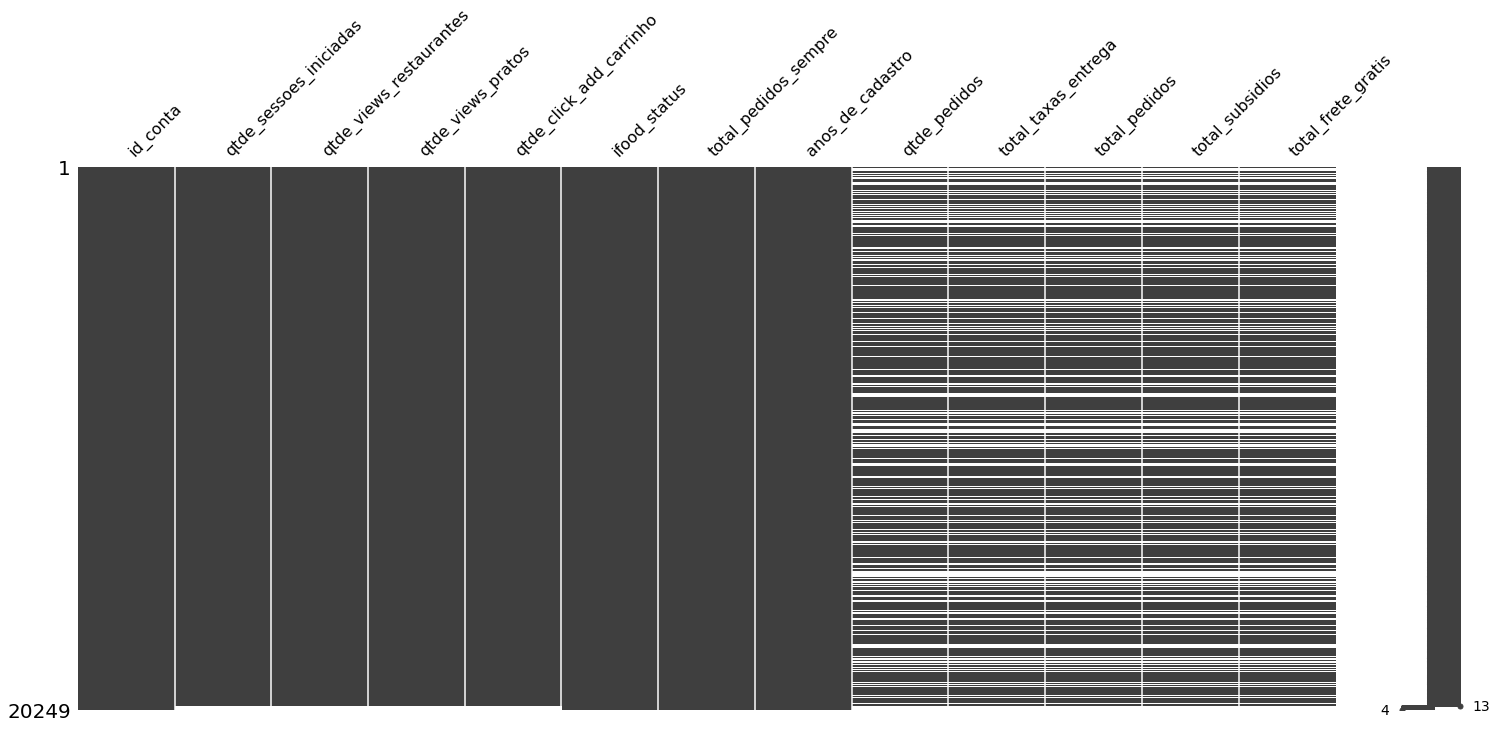

In [60]:
msno.matrix(df_completo)

Visualizando dados com valores nulos:

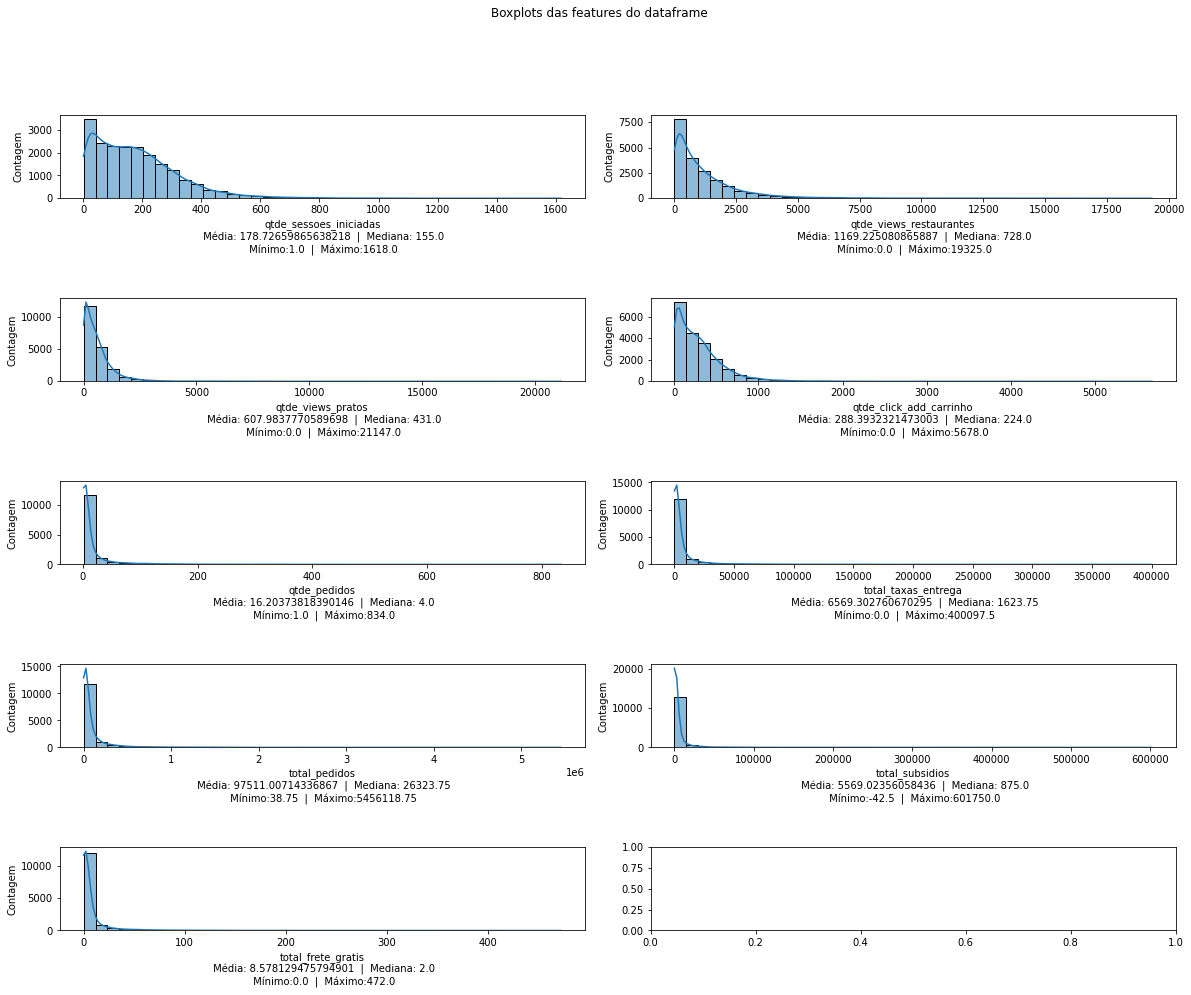

In [99]:
def plota_hist(df):
  colunas = df.columns
  colunas_ar = colunas.to_numpy()
  qtde_colunas = len(colunas)
  if qtde_colunas % 2 != 0:
    colunas_ar = np.append(colunas_ar, 'vazio')

  matriz = colunas_ar.reshape(-1,2)

  fig, axes = plt.subplots(matriz.shape[0], 2, figsize = (20,15))
  fig.subplots_adjust(hspace=1.2, wspace=0.125)
  fig.suptitle('Boxplots das features do dataframe')

  for idx, x in np.ndenumerate(matriz):
    if x != 'vazio':
      sns.histplot(ax=axes[idx[0], idx[1]], x=df[x], kde=True, bins=40)
      axes[idx[0], idx[1]].tick_params(axis='x')
      axes[idx[0], idx[1]].set(xlabel= x + '\n Média: ' + str(df[x].mean()) + '  |  Mediana: ' + str(df[x].median())
        + '\n Mínimo:' + str(df[x].min()) + '  |  Máximo:' + str(df[x].max()), ylabel='Contagem')

  plt.show();

df_copy = df_completo.copy()
df_copy.drop(['id_conta', 'ifood_status', 'total_pedidos_sempre', 'anos_de_cadastro'], axis='columns', inplace=True)
plota_hist(df_copy)


Como a quantidade de registros com dados nulos é muito alta, eu corro o risco de perder muita informação se excluir todos os registros com nulos. A presença de outliers com valores muito altos influenciam a média, por isso vou substituir os nulos com o valor da mediana.

In [100]:
df_completo = df_completo.fillna(df_completo.median())

In [101]:
df_completo.isnull().sum()

id_conta                   0
qtde_sessoes_iniciadas     0
qtde_views_restaurantes    0
qtde_views_pratos          0
qtde_click_add_carrinho    0
ifood_status               0
total_pedidos_sempre       0
anos_de_cadastro           0
qtde_pedidos               0
total_taxas_entrega        0
total_pedidos              0
total_subsidios            0
total_frete_gratis         0
dtype: int64

### Outliers

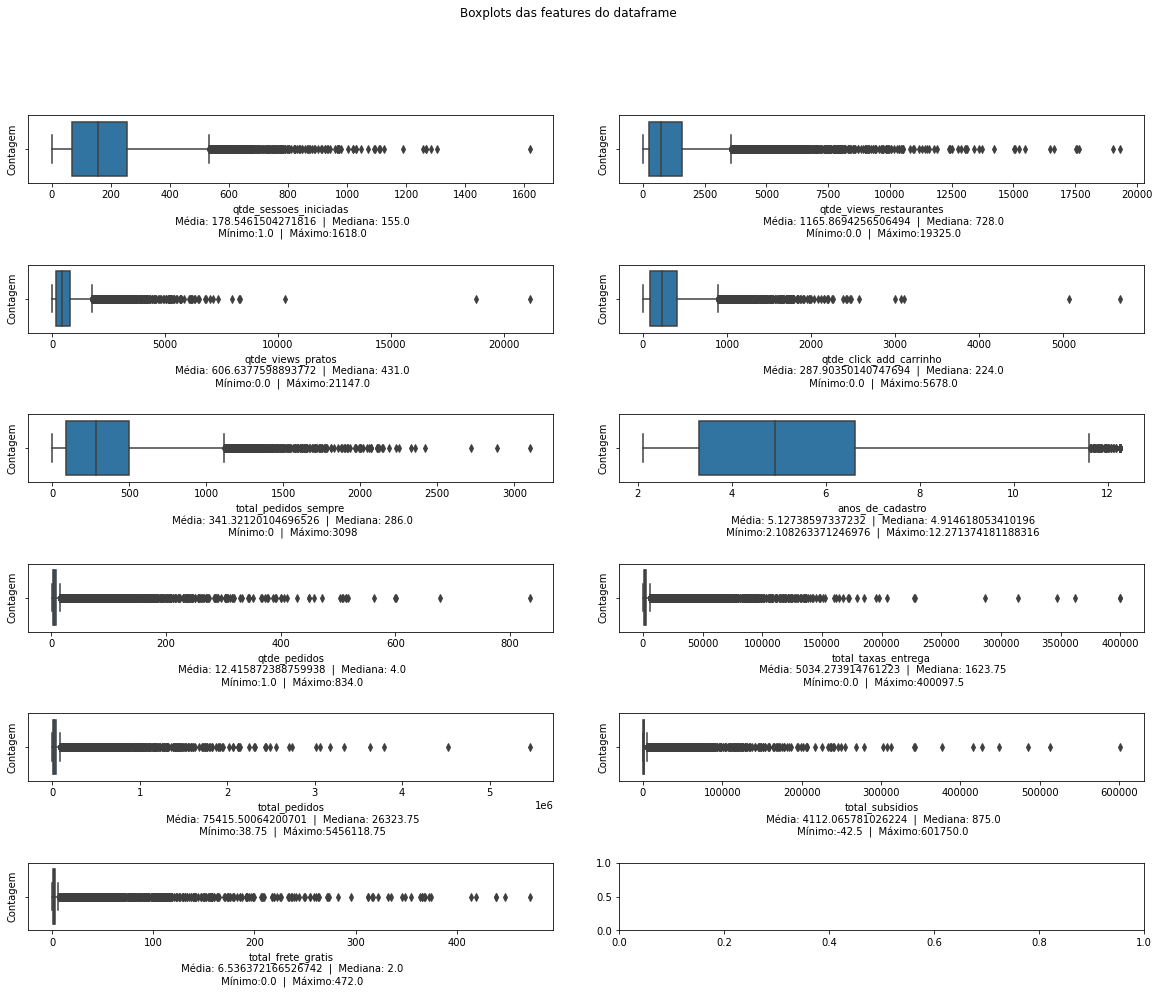

In [102]:
def plota_boxplot(df):
  colunas = df.columns
  colunas_ar = colunas.to_numpy()
  qtde_colunas = len(colunas)
  if qtde_colunas % 2 != 0:
    colunas_ar = np.append(colunas_ar, 'vazio')

  matriz = colunas_ar.reshape(-1,2)

  fig, axes = plt.subplots(matriz.shape[0], 2, figsize = (20,15))
  fig.subplots_adjust(hspace=1.2, wspace=0.125)
  fig.suptitle('Boxplots das features do dataframe')

  for idx, x in np.ndenumerate(matriz):
    if x != 'vazio':
      sns.boxplot(ax=axes[idx[0], idx[1]], x=df[x])
      axes[idx[0], idx[1]].tick_params(axis='x')
      axes[idx[0], idx[1]].set(xlabel= x + '\n Média: ' + str(df[x].mean()) + '  |  Mediana: ' + str(df[x].median())
        + '\n Mínimo:' + str(df[x].min()) + '  |  Máximo:' + str(df[x].max()), ylabel='Contagem')

  plt.show();

df_copy = df_completo.copy()
df_copy.drop(['id_conta', 'ifood_status'], axis='columns', inplace=True)
plota_boxplot(df_copy)

Há vários outliers em todas as features do dataframe final. Quando visualizamos a distribuição da feature pedidos, vimos que existem vários pedidos com valores altos, que podem aumentar consideravelmente os valores de taxas de entrega, de subsídios e do total dos pedidos, por exemplo.

Por isso resolvi não excluí-los e normalizar os dados com Robust Scaler, devido a grande presença de outliers.

## Transformação dos dados

#### Transformando a coluna id_conta em índice

In [106]:
df_completo = df_completo.set_index("id_conta")
df_completo

,qtde_sessoes_iniciadas,qtde_views_restaurantes,qtde_views_pratos,qtde_click_add_carrinho,ifood_status,total_pedidos_sempre,anos_de_cadastro,qtde_pedidos,total_taxas_entrega,total_pedidos,total_subsidios,total_frete_gratis
id_conta,,,,,,,,,,,,
00008f48-df50-41cc-998b-03e3c0dc373a,137.00,1020.00,308.00,205.00,Churn,752,8.20,4.00,1623.75,26323.75,875.00,2.00
000545e9-7929-42fa-8515-d67b4d5c3fc9,115.00,471.00,146.00,105.00,Active,559,6.97,4.00,1623.75,26323.75,875.00,2.00
00073adf-7117-44ba-90fe-5879c9581b68,198.00,697.00,452.00,259.00,Active,270,3.35,1.00,0.00,2737.50,0.00,1.00
000b1fec-8616-4014-9581-c5a944911ac3,351.00,1287.00,872.00,530.00,Active,791,7.67,4.00,1497.50,18671.25,0.00,2.00
000c857f-0bc8-4d4b-8533-b56c44425488,43.00,117.00,138.00,62.00,Inactive,54,3.01,4.00,1623.75,26323.75,875.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
d065aee8-0eca-4243-b804-1d7e2da4669a,155.00,728.00,431.00,224.00,Churn,14,2.14,4.00,1623.75,26323.75,875.00,2.00
7704e365-8f0a-4d76-a696-495c9cf7f1ae,155.00,728.00,431.00,224.00,Inactive,37,4.64,4.00,1623.75,26323.75,875.00,2.00
7a200de1-4259-4843-b8b3-c92637a43515,155.00,728.00,431.00,224.00,Inactive,78,2.68,4.00,1623.75,26323.75,875.00,2.00


#### Transformando variável categórica em numérica

In [116]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
novo_df_completo = df_completo.copy()
novo_df_completo['ifood_status'] = l_encoder.fit_transform(df_completo['ifood_status'])
novo_df_completo

,qtde_sessoes_iniciadas,qtde_views_restaurantes,qtde_views_pratos,qtde_click_add_carrinho,ifood_status,total_pedidos_sempre,anos_de_cadastro,qtde_pedidos,total_taxas_entrega,total_pedidos,total_subsidios,total_frete_gratis
id_conta,,,,,,,,,,,,
00008f48-df50-41cc-998b-03e3c0dc373a,137.00,1020.00,308.00,205.00,1,752,8.20,4.00,1623.75,26323.75,875.00,2.00
000545e9-7929-42fa-8515-d67b4d5c3fc9,115.00,471.00,146.00,105.00,0,559,6.97,4.00,1623.75,26323.75,875.00,2.00
00073adf-7117-44ba-90fe-5879c9581b68,198.00,697.00,452.00,259.00,0,270,3.35,1.00,0.00,2737.50,0.00,1.00
000b1fec-8616-4014-9581-c5a944911ac3,351.00,1287.00,872.00,530.00,0,791,7.67,4.00,1497.50,18671.25,0.00,2.00
000c857f-0bc8-4d4b-8533-b56c44425488,43.00,117.00,138.00,62.00,2,54,3.01,4.00,1623.75,26323.75,875.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
d065aee8-0eca-4243-b804-1d7e2da4669a,155.00,728.00,431.00,224.00,1,14,2.14,4.00,1623.75,26323.75,875.00,2.00
7704e365-8f0a-4d76-a696-495c9cf7f1ae,155.00,728.00,431.00,224.00,2,37,4.64,4.00,1623.75,26323.75,875.00,2.00
7a200de1-4259-4843-b8b3-c92637a43515,155.00,728.00,431.00,224.00,2,78,2.68,4.00,1623.75,26323.75,875.00,2.00


#### Selecionando as variáveis e transformando em npArray

In [117]:
novo_df_completo.shape

(20249, 12)

In [118]:
df_array =  np.array(novo_df_completo)
df_array.shape

(20249, 12)

#### Normalizando com Robust Scaler

In [119]:
from sklearn.preprocessing import RobustScaler

scaler =  RobustScaler()
df_normalizado = scaler.fit_transform(df_array)
df_normalizado

array([[-0.09677419,  0.22021116, -0.19040248, ...,  0.        ,
         0.        ,  0.        ],
       [-0.21505376, -0.19381599, -0.44117647, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2311828 , -0.02337858,  0.03250774, ..., -0.76787531,
        -0.47011417, -0.5       ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Passo 5: Explorar modelo de clusterização

## Avaliando a quantidade ideal de clusteres com o método do cotovelo

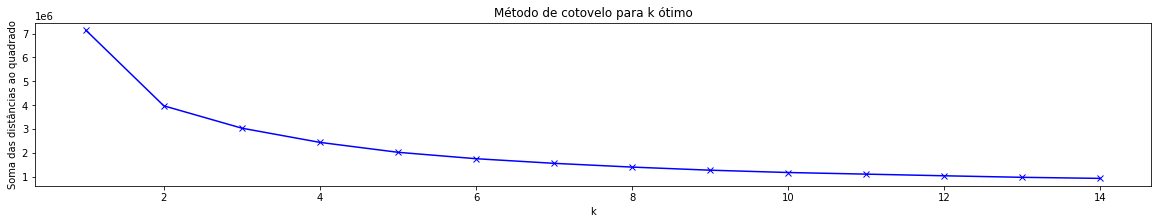

In [121]:
from sklearn.cluster import KMeans

soma_quadrado_distancias =[]
K = range(1,15)

for i in K:
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter=100)
    km = km.fit(df_normalizado)
    soma_quadrado_distancias.append(km.inertia_)
    
###plotting Elbow

plt.plot(K, soma_quadrado_distancias, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma das distâncias ao quadrado')
plt.title('Método de cotovelo para k ótimo')
plt.show()

O método indicou que o número de clusteres ideal é 2.

## Visualizando silhueta escore

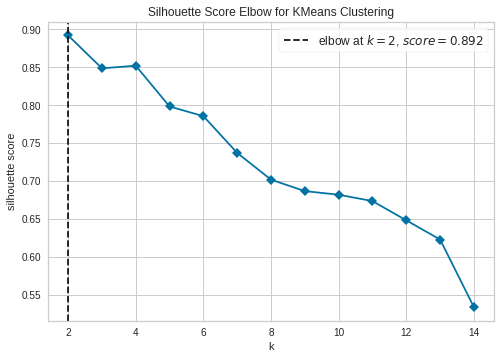

In [122]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123, init = 'k-means++', n_init = 10, max_iter=100) 

visual = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False)

visual.fit(df_normalizado)    
visual.poof()

Em k = 2 podemos notar que os grupos estão melhor separados  e claramente distinguidos. Entretanto a diferença de k = 3 e k = 4 não é muito grande.

## Visualização dos clusteres e distancias para k = 2, k = 3 e k = 4

k = 2

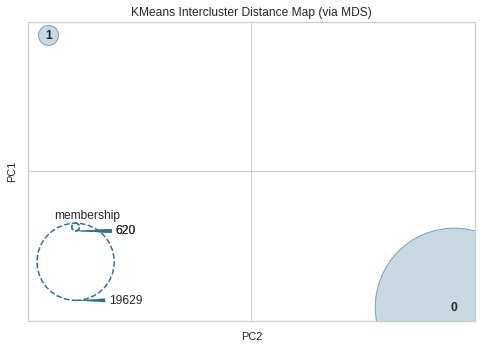

In [132]:
from yellowbrick.cluster import InterclusterDistance

modelo2 = KMeans(2, init = 'k-means++', n_init = 10, max_iter=100)
visualizer = InterclusterDistance(modelo2)

visualizer.fit(df_normalizado)       
visualizer.show();

k = 3

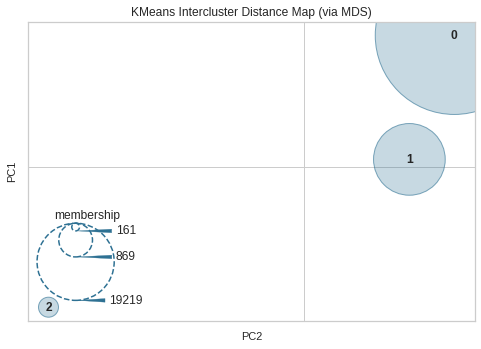

In [133]:
from yellowbrick.cluster import InterclusterDistance

modelo3 = KMeans(3, init = 'k-means++', n_init = 10, max_iter=100)
visualizer = InterclusterDistance(modelo3)

visualizer.fit(df_normalizado)       
visualizer.show();

k = 4

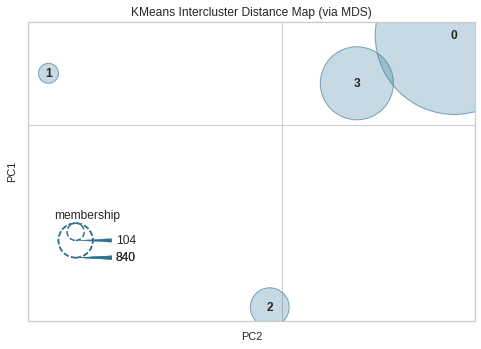

In [135]:
from yellowbrick.cluster import InterclusterDistance

modelo4 = KMeans(4, init = 'k-means++', n_init = 10, max_iter=100)
visualizer = InterclusterDistance(modelo4)

visualizer.fit(df_normalizado)       
visualizer.show();

## Associando os rótulos aos dados originais

In [137]:
novo_df_completo['cluster_k2'] = modelo2.labels_
novo_df_completo['cluster_k3'] = modelo3.labels_
novo_df_completo['cluster_k4'] = modelo4.labels_

In [145]:
novo_df_completo.sample(10)

,qtde_sessoes_iniciadas,qtde_views_restaurantes,qtde_views_pratos,qtde_click_add_carrinho,ifood_status,total_pedidos_sempre,anos_de_cadastro,qtde_pedidos,total_taxas_entrega,total_pedidos,total_subsidios,total_frete_gratis,cluster_k2,cluster_k3,cluster_k4
id_conta,,,,,,,,,,,,,,,
cf85f304-73ce-4ee4-a5b0-c655f64c2d7e,184.00,495.00,532.00,317.00,0,438,6.60,1.00,0.00,9962.50,0.00,1.00,0,0,0
a3f4fff6-8078-4bdd-a46b-b046b4d040ba,111.00,440.00,384.00,179.00,2,74,3.63,3.00,997.50,15821.25,1000.00,1.00,0,0,0
d03e7096-bac2-472b-a152-7e6e08a7cca0,71.00,109.00,93.00,47.00,0,29,5.33,4.00,1623.75,26323.75,875.00,2.00,0,0,0
92b77db9-b232-41fd-a2b1-03f0e1dd8797,325.00,3547.00,1300.00,458.00,2,612,7.74,195.00,3850.00,2246715.00,245283.75,192.00,1,2,2
adf6b7d2-bcfc-4e9b-b97e-7d170e19f753,100.00,320.00,93.00,81.00,2,171,2.70,107.00,4991.25,397116.25,0.00,100.00,1,1,3
a7245fed-dfa0-4008-bed1-4ed8191eb037,238.00,439.00,590.00,425.00,0,384,3.14,1.00,998.75,10411.25,0.00,0.00,0,0,0
f405e96a-92e8-406c-b59a-d398d00e2541,124.00,368.00,407.00,220.00,0,694,5.91,1.00,1498.75,15873.75,0.00,0.00,0,0,0
d30effbf-47cb-448d-ad5b-2574923c75cf,18.00,416.00,449.00,410.00,1,206,2.68,63.00,9110.00,185533.75,0.00,38.00,0,0,0
6ed0e144-093f-4a83-ac54-1d56f30010f1,32.00,193.00,75.00,29.00,1,76,6.40,4.00,1623.75,26323.75,875.00,2.00,0,0,0


In [154]:
df_resultado = novo_df_completo
df_resultado.head()

,qtde_sessoes_iniciadas,qtde_views_restaurantes,qtde_views_pratos,qtde_click_add_carrinho,ifood_status,total_pedidos_sempre,anos_de_cadastro,qtde_pedidos,total_taxas_entrega,total_pedidos,total_subsidios,total_frete_gratis,cluster_k2,cluster_k3,cluster_k4
id_conta,,,,,,,,,,,,,,,
00008f48-df50-41cc-998b-03e3c0dc373a,137.00,1020.00,308.00,205.00,1,752,8.20,4.00,1623.75,26323.75,875.00,2.00,0,0,0
000545e9-7929-42fa-8515-d67b4d5c3fc9,115.00,471.00,146.00,105.00,0,559,6.97,4.00,1623.75,26323.75,875.00,2.00,0,0,0
00073adf-7117-44ba-90fe-5879c9581b68,198.00,697.00,452.00,259.00,0,270,3.35,1.00,0.00,2737.50,0.00,1.00,0,0,0
000b1fec-8616-4014-9581-c5a944911ac3,351.00,1287.00,872.00,530.00,0,791,7.67,4.00,1497.50,18671.25,0.00,2.00,0,0,0
000c857f-0bc8-4d4b-8533-b56c44425488,43.00,117.00,138.00,62.00,2,54,3.01,4.00,1623.75,26323.75,875.00,2.00,0,0,0
